<a href="https://colab.research.google.com/github/guard1000/NLP_MCC/blob/master/keras_reuters_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 데이터 불러오기
# MLP때 사용한 데이터 - 201701-201704 뉴스 크롤링
# dic 안에 X: ~~~ , Y: ~~~ 로 들어있었음 개씩
#  X 안에는 56681 길이의 리스트(벡터)가 8419개 있는거고, y는 int로 8419개 있음
import json

data_json =  json.load(open("/content/drive/My Drive/data/data.json"))

In [19]:
# data_json 정보 확인
print('query 개수:',len(data_json['X']), 'GT개수:', len(data_json['Y']))
print('X Y type:', type(data_json['X'][0]), type(data_json['Y'][0]))
print("data_json['X'][0]의 len:", len(data_json['X'][0]))
print("data_json['X'][0]의 내용 앞 10개:", data_json['X'][0][:10])

query 개수: 8419 GT개수: 8419
X Y type: <class 'list'> <class 'int'>
data_json['X'][0]의 len: 56681
data_json['X'][0]의 내용 앞 10개: [4, 7, 18, 4, 1, 4, 7, 1, 1, 5]


In [0]:
# 필요 라이브러리들 소환
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
# train용, 훈련 검증용, test용 분리
x_train, x_test, y_train, y_test = train_test_split(data_json['X'], data_json['Y'])
x_train, x_test = np.array(x_train), np.array(x_test)
y_train, y_test = np.array(y_train), np.array(y_test)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

print(len(x_train), len(x_test)) # 6314개와 2105개

6314 2105


In [34]:
# 모델 만들기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(56681, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                3627648   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 3,632,198
Trainable params: 3,632,198
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [36]:
history = model.fit(
    partial_x_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 5314 samples, validate on 1000 samples
Epoch 1/20
5314/5314 [==============================] - 4s 751us/sample - loss: 1.1492 - acc: 0.6972 - val_loss: 0.5488 - val_acc: 0.8750
Epoch 2/20
5314/5314 [==============================] - 4s 675us/sample - loss: 0.3116 - acc: 0.9351 - val_loss: 0.3690 - val_acc: 0.8890
Epoch 3/20
5314/5314 [==============================] - 4s 672us/sample - loss: 0.1333 - acc: 0.9780 - val_loss: 0.3610 - val_acc: 0.9000
Epoch 4/20
5314/5314 [==============================] - 4s 678us/sample - loss: 0.0801 - acc: 0.9880 - val_loss: 0.3494 - val_acc: 0.8980
Epoch 5/20
5314/5314 [==============================] - 4s 673us/sample - loss: 0.0559 - acc: 0.9930 - val_loss: 0.3824 - val_acc: 0.9030
Epoch 6/20
5314/5314 [==============================] - 4s 685us/sample - loss: 0.0582 - acc: 0.9921 - val_loss: 0.3699 - val_acc: 0.9080
Epoch 7/20
5314/5314 [==============================] - 4s 683us/sample - loss: 0.0428 - acc: 0.9945 - val_loss: 0.4047 - va

In [0]:
#그래프 그려보고 싶을때
def show_graph(history):
    history_dict = history.history
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

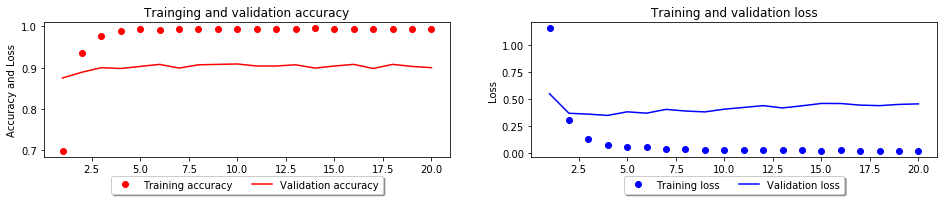

In [38]:
# 결과 그래프 표시
show_graph(history)

In [43]:
answer = [np.argmax(i) for i in predictions]

ac_score = metrics.accuracy_score(y_test, answer)
cl_report = metrics.classification_report(y_test, answer)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9163895486935867
리포트 =
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       368
           1       0.92      0.90      0.91       348
           2       0.88      0.91      0.90       356
           3       0.89      0.92      0.90       342
           4       0.94      0.87      0.90       354
           5       0.93      0.94      0.94       337

    accuracy                           0.92      2105
   macro avg       0.92      0.92      0.92      2105
weighted avg       0.92      0.92      0.92      2105

